# How to deal with individual abundances?

In [15]:
from transformer_payne import TransformerPayne, METALS, vac_to_air, air_to_vac
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
spec_emulator = TransformerPayne.download()

Using atribute `.parameter_names` we can get the parameters of the emulator:

In [4]:
print(spec_emulator.parameter_names) # 'logteff', 'logg', 'vmic' ... individual abundances ... and "mu" for the cosine angle of the ray relative to the normal to the surface

['logteff', 'logg', 'vmic', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'Ar', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Po', 'At', 'Rn', 'Fr', 'Ra', 'Ac', 'Th', 'Pa', 'U', 'mu']


We can get solar parameters from within the emulator object as below:

In [5]:
parameters = spec_emulator.solar_parameters
parameters

array([ 3.76170237,  4.44      ,  1.        , 10.93      ,  1.05      ,
        1.38      ,  2.7       ,  8.39      ,  7.78      ,  8.66      ,
        4.56      ,  7.84      ,  6.17      ,  7.53      ,  6.37      ,
        7.51      ,  5.36      ,  7.14      ,  5.5       ,  6.18      ,
        5.08      ,  6.31      ,  3.17      ,  4.9       ,  4.        ,
        5.64      ,  5.39      ,  7.45      ,  4.92      ,  6.23      ,
        4.21      ,  4.6       ,  2.88      ,  3.58      ,  2.29      ,
        3.33      ,  2.56      ,  3.25      ,  2.6       ,  2.92      ,
        2.21      ,  2.58      ,  1.42      ,  1.92      , -5.        ,
        1.84      ,  1.12      ,  1.66      ,  0.94      ,  1.77      ,
        1.6       ,  2.        ,  1.        ,  2.19      ,  1.51      ,
        2.24      ,  1.07      ,  2.17      ,  1.13      ,  1.7       ,
        0.58      ,  1.45      , -5.        ,  1.        ,  0.52      ,
        1.11      ,  0.28      ,  1.14      ,  0.51      ,  0.93

These parameters can be directly used to predict the intenisty of the spectrum at a given wavelengts:

In [16]:
wave = air_to_vac(np.linspace(6500, 7000, 20000))
mu = 1.0

spec_intensities = spec_emulator(np.log10(wave), mu, parameters)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


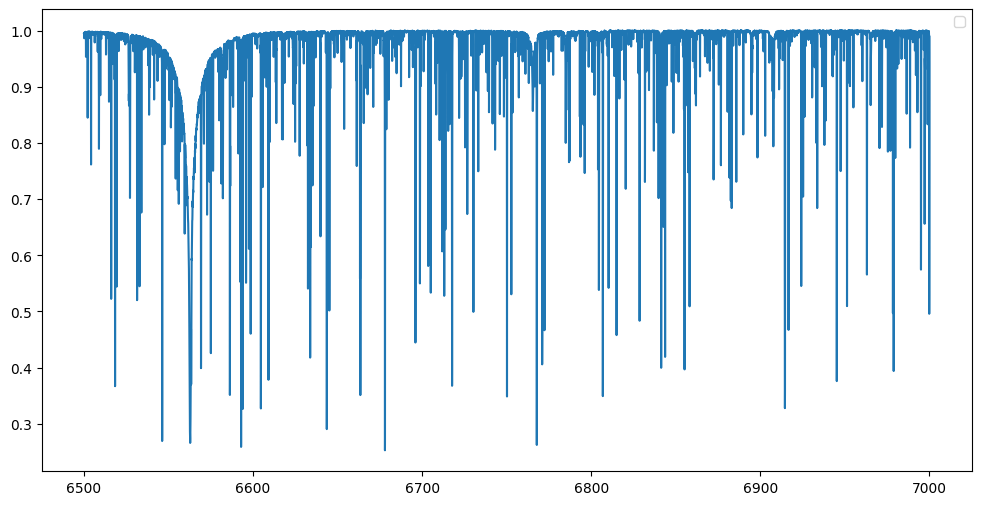

In [18]:
# Plot the blackbody and the emulator intensities
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
# on the top full on the bottom zoomed in
ax.plot(vac_to_air(wave), spec_intensities[:,0]/spec_intensities[:,1])
ax.legend()

The most typical way of manipulating a parameters is using a `.to_parameters()` method where we can use names from `parameter_names` to set all relevant stellar atmopshere labels. Labels defined as `abundance_labels` are by default defined relative to solar composition as defined in attribute `.solar_parameters`. All labels which are not set explicitely will be set to solar defaults.

In [8]:
spec_emulator.to_parameters({"logteff":np.log10(5000), "logg":4.5, "He":0.0, "Li":-0.3},  relative=True) \
- spec_emulator.to_parameters({"logteff":np.log10(5000), "logg":4.0, "He":9.93},  relative=False)

/Users/tr/repos/transformer_payne/src/transformer_payne/transformer_payne.py:261: UserWarning: Possible exceeding parameter bonds - extrapolating.
  warnings.warn("Possible exceeding parameter bonds - extrapolating.")


array([ 0. ,  0.5,  0. ,  1. , -0.3,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ])

Now use the most complex methods of setting abundances with respect to solar values or with respoect to arbitrary element.

In [25]:
ALPHA_AND_O_MARCS_SDSS = ["Ne", "Mg", "Si", "S", "Ar", "Ca", "Ti", "O"]

p = spec_emulator.to_parameters({"logteff":np.log10(4500), "logg":2.3, "vmic":0.5}) # set logteff, logg, and vmic
p = spec_emulator.set_group_of_abundances_relative_to_solar(p, 0.5, group=METALS[:90]) # set the metallicity to 0.5 dex
# # set the [C/Fe] abundance to -0.3 dex relative to solar [C/Fe] :
p = spec_emulator.set_abundances_relative_to_arbitrary_element(p, -0.3, set_element="C", reference_element="Fe") 
# set the [ALPHA_O/Fe] abundance to -0.5 dex relative to solar [ALPHA_O/Fe]:
p = spec_emulator.set_abundances_relative_to_arbitrary_element(p, -1.5, set_element=ALPHA_AND_O_MARCS_SDSS, reference_element="Fe") 
# ---
p_Li_03 = spec_emulator.set_abundances_relative_to_arbitrary_element(p, 0.3, set_element="Li", reference_element="Li") 
p_Li_m03 = spec_emulator.set_abundances_relative_to_arbitrary_element(p, -0.3, set_element="Li", reference_element="Li")

In [26]:
wave = air_to_vac(np.linspace(6500, 6800, 20000))
mu = 1.0

spec_intensities = spec_emulator(np.log10(wave), mu, p)
spec_intensities_Li_03 = spec_emulator(np.log10(wave), mu, p_Li_03)
spec_intensities_Li_m03 = spec_emulator(np.log10(wave), mu, p_Li_m03)

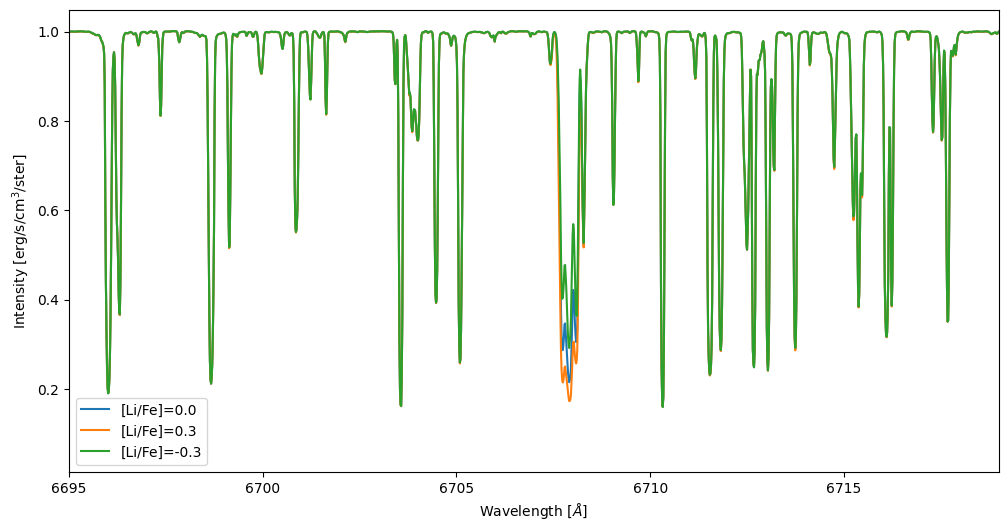

In [27]:
# Plot the blackbody and the emulator intensities
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
# on the top full on the bottom zoomed in
ax.plot(vac_to_air(wave), spec_intensities[:,0]/spec_intensities[:,1], label="[Li/Fe]=0.0")
ax.plot(vac_to_air(wave), spec_intensities_Li_03[:,0]/spec_intensities_Li_03[:,1], label="[Li/Fe]=0.3")
ax.plot(vac_to_air(wave), spec_intensities_Li_m03[:,0]/spec_intensities_Li_m03[:,1], label="[Li/Fe]=-0.3")

ax.legend()
ax.set_xlim(6695, 6719)
ax.set_xlabel("Wavelength [$\AA$]")
ax.set_ylabel("Intensity [erg/s/cm$^3$/ster]")
ax.legend(loc="lower left")